<a href="https://colab.research.google.com/github/dvillaj/R_Examples/blob/main/Example_Classification_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
install.packages("C50")

also installing the dependency 'Cubist'




package 'Cubist' successfully unpacked and MD5 sums checked
package 'C50' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Daniel\AppData\Local\Temp\RtmpcBFZ8P\downloaded_packages


In [3]:
library(C50)

In [4]:
library(rpart)

In [5]:
install.packages("rpart.plot")

package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Daniel\AppData\Local\Temp\RtmpcBFZ8P\downloaded_packages


In [6]:
library(rpart.plot)

In [7]:
install.packages("modeldata")

package 'modeldata' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Daniel\AppData\Local\Temp\RtmpcBFZ8P\downloaded_packages


In [8]:
library(modeldata)
data(mlc_churn)

In [9]:
glimpse(mlc_churn)

Rows: 5,000
Columns: 20
$ state                         <fct> KS, OH, NJ, OH, OK, AL, MA, MO, LA, WV, ~
$ account_length                <int> 128, 107, 137, 84, 75, 118, 121, 147, 11~
$ area_code                     <fct> area_code_415, area_code_415, area_code_~
$ international_plan            <fct> no, no, no, yes, yes, yes, no, yes, no, ~
$ voice_mail_plan               <fct> yes, yes, no, no, no, no, yes, no, no, y~
$ number_vmail_messages         <int> 25, 26, 0, 0, 0, 0, 24, 0, 0, 37, 0, 0, ~
$ total_day_minutes             <dbl> 265.1, 161.6, 243.4, 299.4, 166.7, 223.4~
$ total_day_calls               <int> 110, 123, 114, 71, 113, 98, 88, 79, 97, ~
$ total_day_charge              <dbl> 45.07, 27.47, 41.38, 50.90, 28.34, 37.98~
$ total_eve_minutes             <dbl> 197.4, 195.5, 121.2, 61.9, 148.3, 220.6,~
$ total_eve_calls               <int> 99, 103, 110, 88, 122, 101, 108, 94, 80,~
$ total_eve_charge              <dbl> 16.78, 16.62, 10.30, 5.26, 12.61, 18.75,~
$ total_night_mi

In [10]:
mlc_churn <- mlc_churn %>% mutate(id = row_number())

In [11]:
churnTrain <- mlc_churn %>% 
          sample_frac(.70)

In [12]:
churnTest  <- anti_join(mlc_churn, churnTrain, by = 'id')

In [13]:
select(churnTrain, churn, international_plan, 
                   total_day_minutes, 
                   total_intl_minutes, 
                   total_intl_calls, 
                   number_customer_service_calls) %>% 
    head()

churn,international_plan,total_day_minutes,total_intl_minutes,total_intl_calls,number_customer_service_calls
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>
no,no,232.5,10.4,6,4
no,no,77.6,14.9,4,1
no,no,195.0,14.8,9,0
no,no,159.5,7.2,4,2
yes,no,253.6,10.2,3,3
no,no,130.8,10.0,5,1


In [14]:
model <- rpart(churn ~ international_plan +
                   total_day_minutes +
                   total_intl_minutes + 
                   total_intl_calls +
                   number_customer_service_calls,
              data = churnTrain,
              parms = list(split = "information")
)

In [15]:
prediction <- predict( model, churnTest, type = "class")

In [16]:
churnTest %>% 
    mutate ( churn_predicted = prediction ) %>%
    select ( churn, churn_predicted,
                   international_plan, 
                   total_day_minutes, 
                   total_intl_minutes, 
                   total_intl_calls, 
                   number_customer_service_calls) %>%
    head()

churn,churn_predicted,international_plan,total_day_minutes,total_intl_minutes,total_intl_calls,number_customer_service_calls
<fct>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>
no,no,no,218.2,7.5,7,3
no,no,no,184.5,8.7,4,1
no,no,no,196.4,13.8,4,1
no,no,no,189.7,10.0,5,1
no,no,no,155.1,10.6,4,0
no,no,no,81.1,10.3,2,0


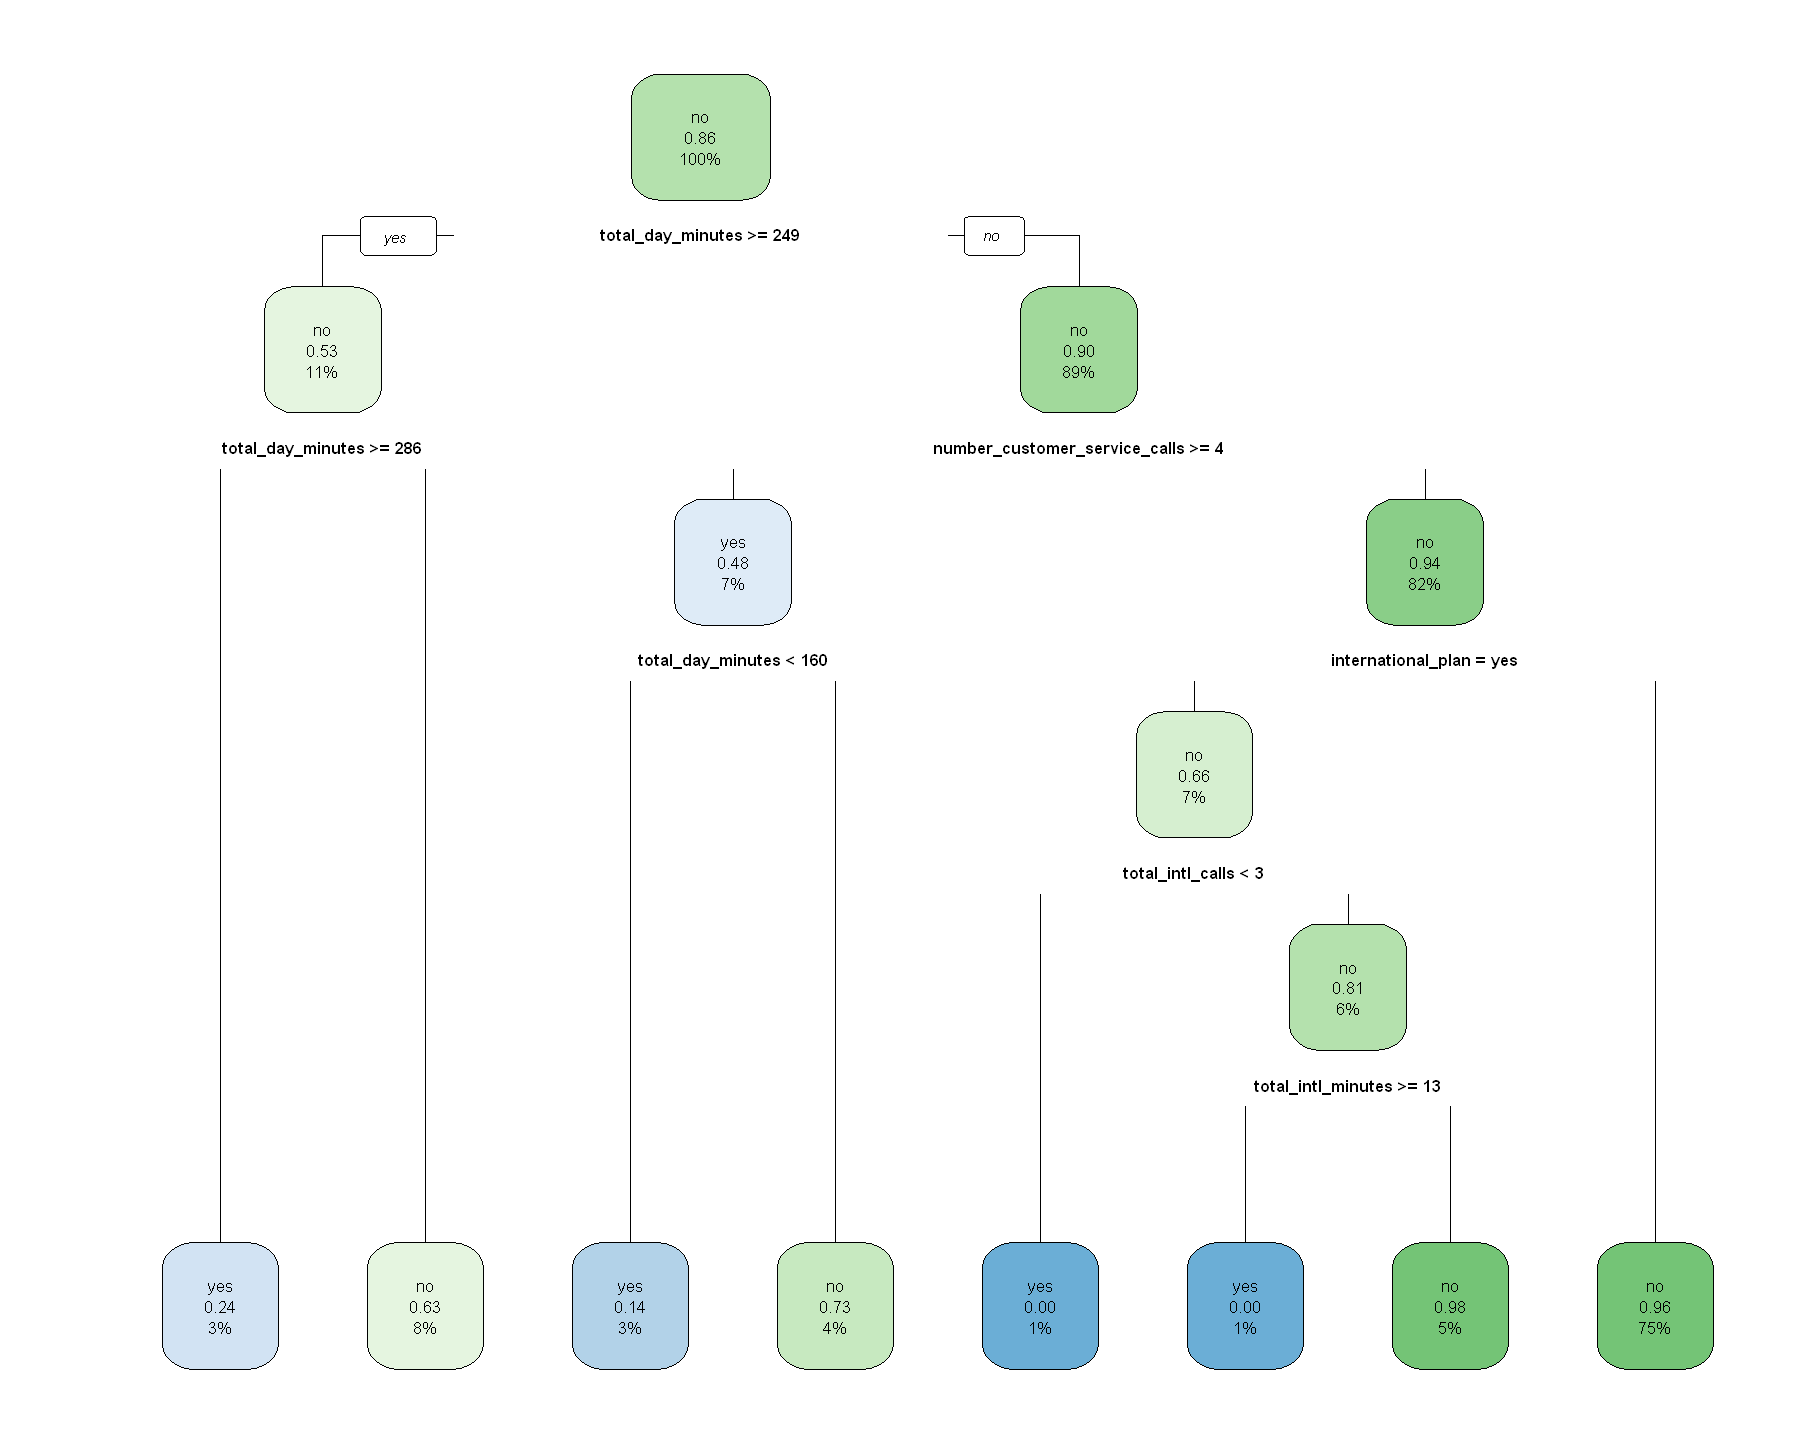

In [17]:
options(repr.plot.width=15, repr.plot.height=12)

rpart.plot(model)

In [18]:
table(churnTest$churn, prediction)  %>% 
    as_tibble(.name_repair = "unique") %>%
    rename(original_value = `...1`) %>%
    mutate(`%` = sprintf("%03.2f", n / nrow(churnTest) * 100)) %>%
    arrange(original_value, prediction)

New names:
* `` -> ...1



original_value,prediction,n,%
<chr>,<chr>,<int>,<chr>
no,no,1270,84.67
no,yes,12,0.80
yes,no,107,7.13
yes,yes,111,7.40
